import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # optional
warnings. filterwarnings('ignore')
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df

NameError: name 'df' is not defined

In [2]:
#create dataframe from dataset
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\swati\practice project\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [7]:
#stats behind our datafrme including object datatype
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
#check the unique value in object datatype column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
#check the null values in dataframe
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Preprocessing 1


In [12]:
#remove 'id' columns bcz this is not really useful for our model, and
#if we don't remove it our model consider it as real value and make wrong prediction#

df.drop('id',axis=1, inplace = True)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
#remove null values in 'bmi' column
df.dropna(axis=0, inplace= True)

In [15]:
#identify the index of "other" value in 'gender' column
df[df['gender']=='other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [17]:
#exploring dataframe using group by of "work type" column
work_type_gb=df.groupby("work_type")
work_type_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,
Govt_job,50.717460,0.106349,0.052381,107.356825,30.522063,0.044444
Never_worked,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,45.203842,0.090715,0.049449,105.660996,30.304625,0.045180
Self-employed,59.916129,0.166452,0.090323,112.389161,30.211871,0.068387
children,6.877973,0.000000,0.001490,94.009806,20.038003,0.001490


In [18]:
#exploring dataframe using group by of "residence type" column
residence_type_gb = df.groupby("Residence_type")
residence_type_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,
Rural,42.614866,0.092187,0.050021,105.648404,28.894212,0.041339
Urban,43.108739,0.091566,0.048996,104.971683,28.892289,0.043775


In [19]:
#exploring dataframe using group by of "smoking_status" column
smoking_status_gb = df.groupby("smoking_status")
smoking_status_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
Unknown,29.511207,0.028995,0.024949,98.335927,25.666352,0.019555
formerly smoked,54.923536,0.131422,0.083632,112.579821,30.747192,0.068100
never smoked,46.469222,0.116631,0.043737,107.136215,29.982559,0.045356
smokes,46.986431,0.111262,0.074627,106.465699,30.543555,0.052917


In [20]:
#exploring dataframe using group by of "gender" column
gender_status_gb = df.groupby("gender")
gender_status_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.437805,0.086641,0.034518,103.329914,29.065758,0.041422
Male,42.049130,0.099453,0.071109,108.131721,28.647936,0.044257
Other,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [21]:
#exploring dataframe using group by of "ever_married" column
smoking_status_gb = df.groupby("ever_married")
smoking_status_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,
No,21.818252,0.027566,0.016422,96.087466,25.214721,0.013490
Yes,54.065543,0.126092,0.067104,110.210315,30.850749,0.058052


Exploratory Data Analysis(EDA)

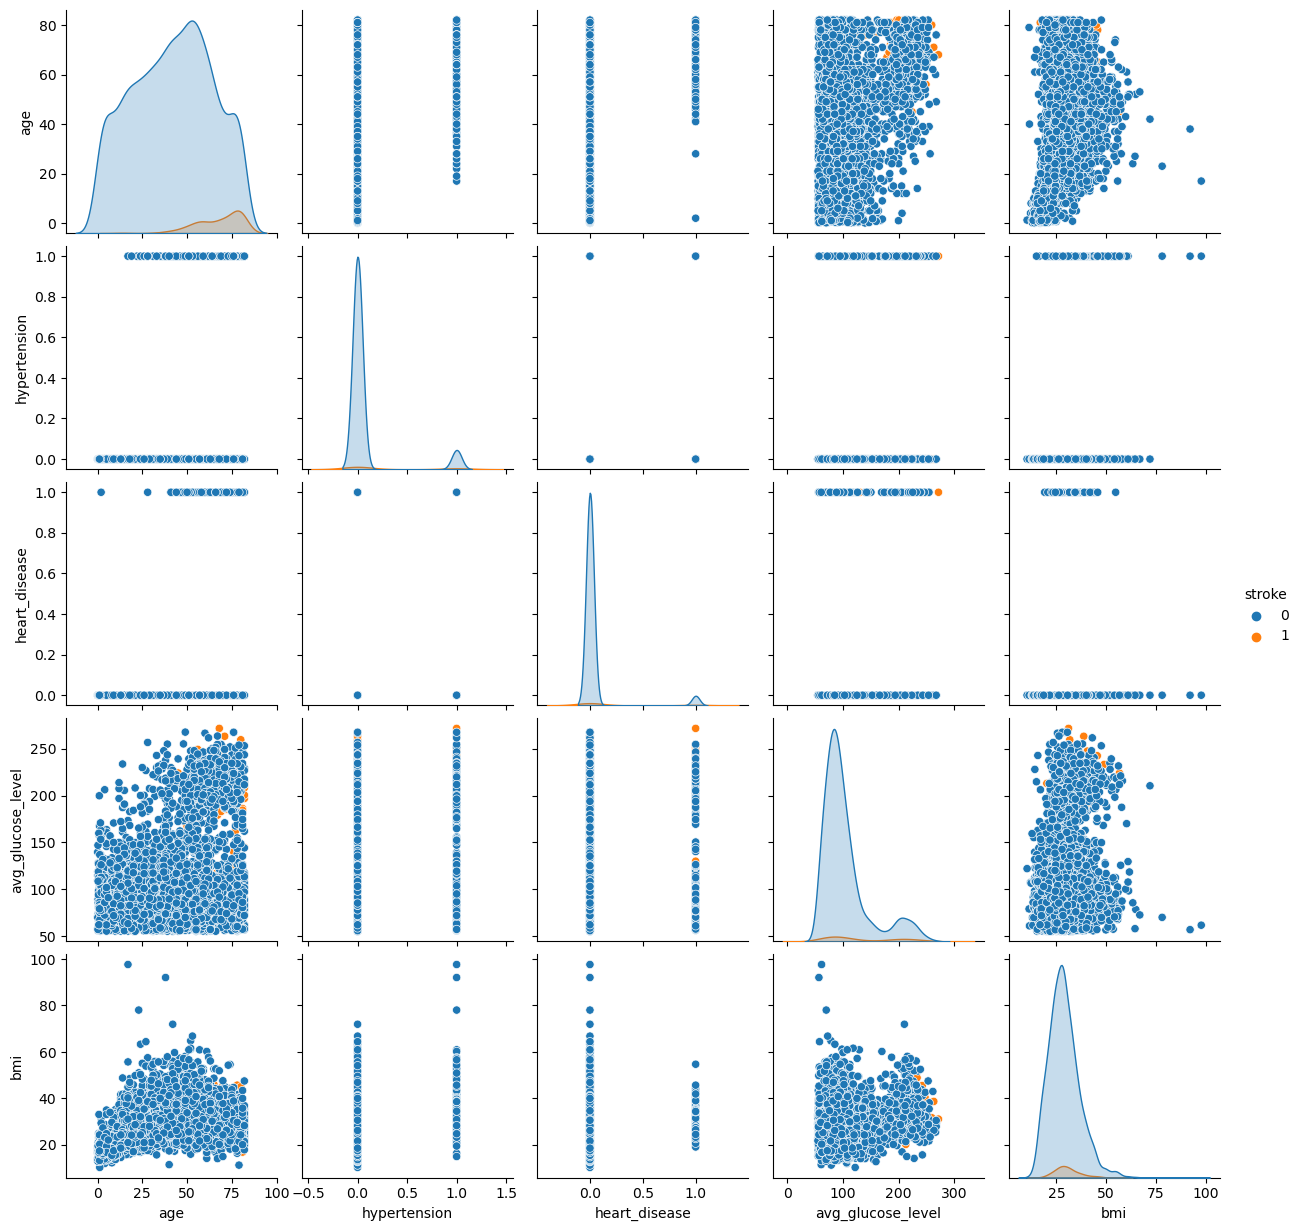

In [22]:
# Let's Create a lazy plot called pairplot for normal analysis of complete date
sns.pairplot(df,hue = 'stroke')

Univate Analysis

Text(0.5, 1.02, 'feature Distribution')

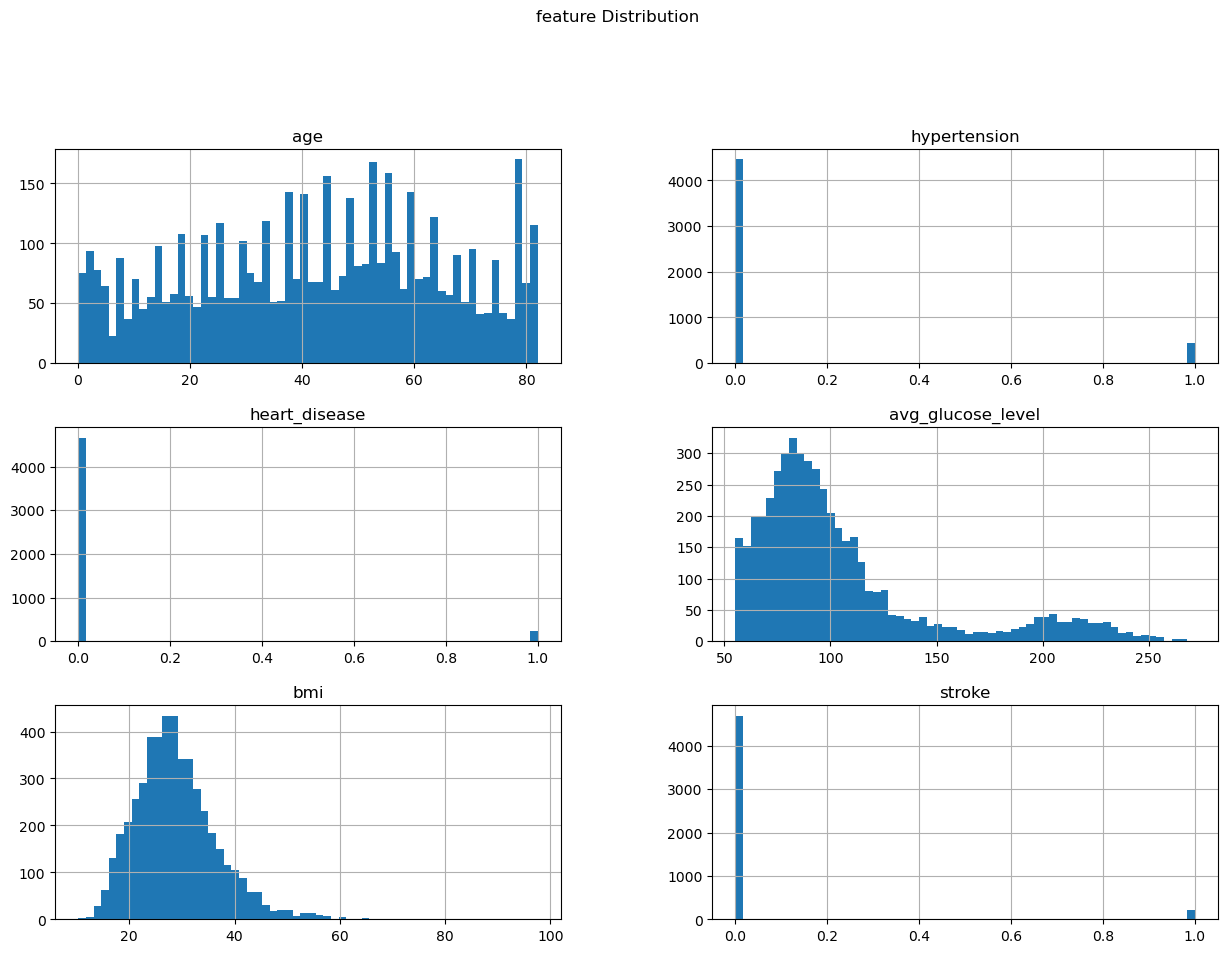

In [23]:
#check the distribustion of dataset features
df.hist(bins=60,figsize=(15,10))
plt.suptitle("feature Distribution", x=0.5, y=1.02, ha="center", fontsize="large")

Text(0.5, 1.02, 'Feature Distribustion')

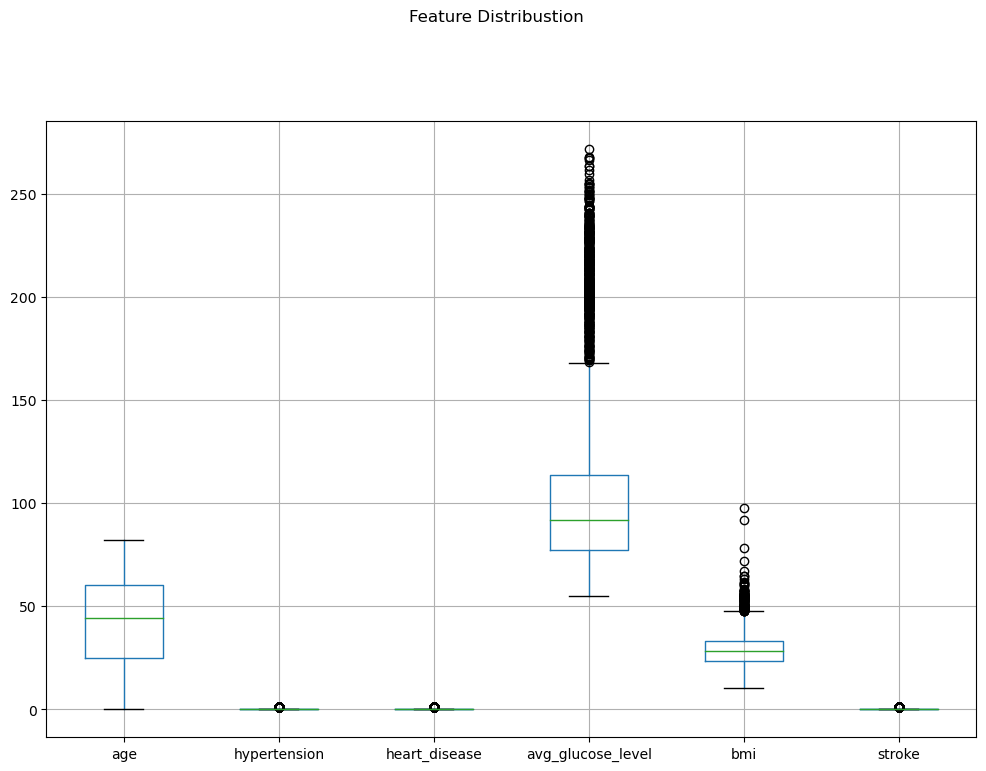

In [24]:
#check the distribustion of dataset features using barplot
df.boxplot(figsize=(12,8))
plt.suptitle("Feature Distribustion", x=0.5, y=1.02, ha="center", fontsize='large')

As we are able see that column "avg glucose level" and 'bmi' has more outliers as compare to others.

([<matplotlib.patches.Wedge at 0x14ebaf16650>,
 [Text(-0.5076198340574394, 0.9758699216962771, 'married'),
  Text(0.5076197426899014, -0.9758699692230715, 'Not Married')],
 [Text(-0.27688354584951236, 0.5322926845616056, '65%'),
  Text(0.2768834960126735, -0.5322927104853117, '35%')])

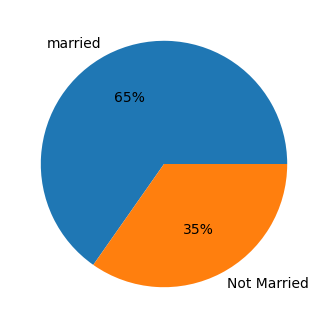

In [24]:
# list of the married column
married = ["married", "Not Married"]

# make an object which store value count of the elements in married column
married_data = pd.Series(df["ever_married"]).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

#ploting pie chart
plt.pie(married_data, labels=married, autopct="%.0f%%")


([<matplotlib.patches.Wedge at 0x2e3a14088b0>,
 [Text(-0.24879108922736856, 1.071495680775737, 'Private'),
  Text(-0.637819388573941, -0.8962066879683303, 'Self-Employed'),
  Text(0.33227718432992226, -1.0486142630985806, 'Children'),
  Text(0.9992482661232499, -0.45989444729163553, 'Govt.Job'),
  Text(1.0998909760027331, -0.015486797853505655, 'Never Worked')],
 [Text(-0.13570423048765556, 0.5844521895140382, '57%'),
  Text(-0.34790148467669507, -0.4888400116190892, '16%'),
  Text(0.18124210054359394, -0.5719714162355893, '14%'),
  Text(0.5450445087944998, -0.25085151670452843, '13%'),
  Text(0.5999405323651271, -0.008447344283730356, '0%')])

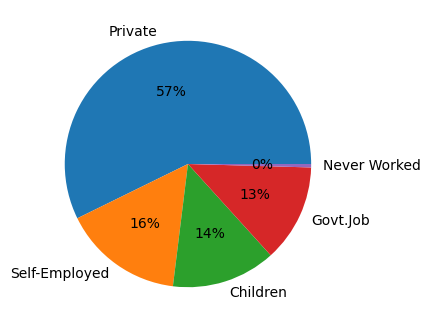

In [26]:
#List for the work_type column
work_type = ["Private", "Self-Employed","Children", "Govt.Job", "Never Worked"]

# make an object which store value count of the elements in work_type column
work_type_data = pd.Series(df["work_type"]).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,4))

#ploting pie chart
plt.pie(work_type_data, labels=work_type, autopct = "%.0f%%")

([<matplotlib.patches.Wedge at 0x14ebae7fee0>,
 [Text(-0.024988442123531567, 1.0997161350822489, 'Urban'),
  Text(0.02498833916067572, -1.099716137421831, 'Rural')],
 [Text(-0.013630059340108127, 0.5998451645903176, '51%'),
  Text(0.013630003178550391, -0.5998451658664531, '49%')])

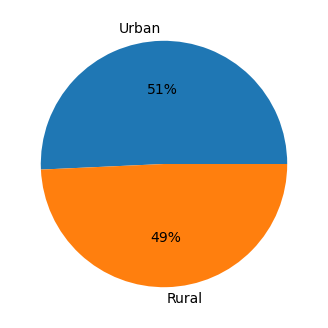

In [25]:
#list for the Residence_type_column
Residence_type = ["Urban", "Rural"]

# make an object which store value count of the elements in Residence_type column
residence_type_data = pd.Series(df['Residence_type']).value_counts()

# adjust size of the pie chart
plt.figure(figsize = (6,4))

# ploting pie chart
plt.pie(residence_type_data, labels=Residence_type, autopct="%.0f%%")

([<matplotlib.patches.Wedge at 0x14ebaa2ba90>,
 [Text(0.41370568939794106, 1.019238736783377, 'Never Smoked'),
  Text(-1.0826371715443341, -0.1946708884001004, 'Unknown'),
  Text(0.10087674486582987, -1.0953647257170893, 'Formerly Smoked'),
  Text(0.9798993679479736, -0.4997971875622773, 'Smokes')],
 [Text(0.22565764876251326, 0.555948401881842, '38%'),
  Text(-0.5905293662969094, -0.10618412094550932, '30%'),
  Text(0.055023679017725376, -0.5974716685729577, '17%'),
  Text(0.5344905643352582, -0.2726166477612421, '15%')])

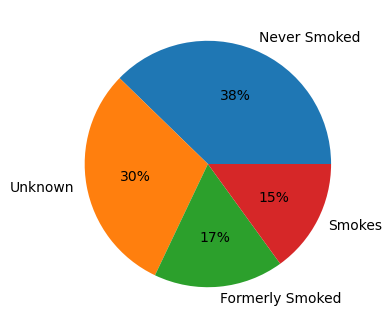

In [26]:
#list for the smoking_status column
smoking_status = ["Never Smoked", "Unknown", "Formerly Smoked", "Smokes"]

# make an object which store value count of the elements in smoking_status column
smoking_status_data = pd.Series(df["smoking_status"]).value_counts()

#adjust size of the pie chart
plt.figure(figsize = (6,4))

#ploting pie chart
plt.pie(smoking_status_data,labels=smoking_status, autopct="%.0f%%")

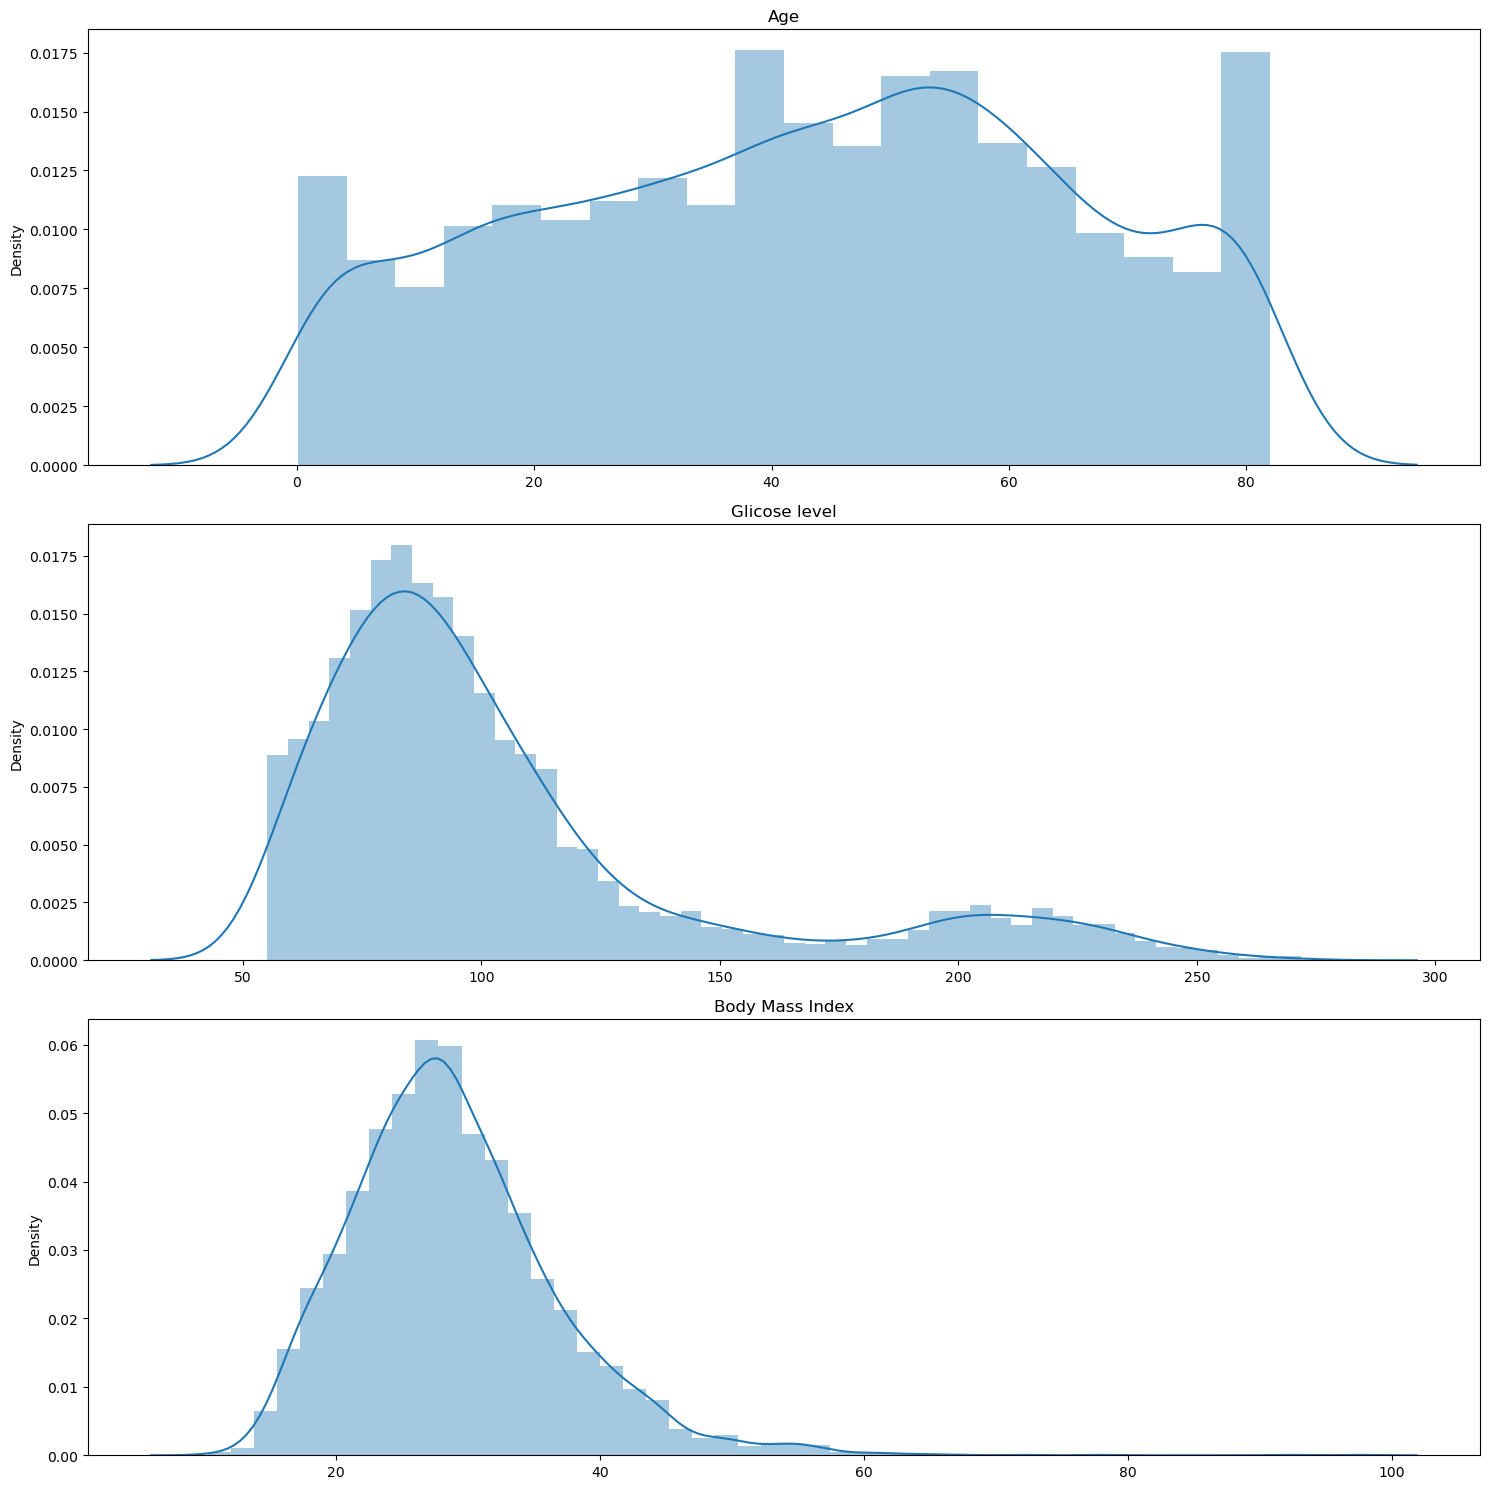

In [28]:
#Let's see the distribustion of real numbers columns with the help of
#kde plot
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.distplot(x=df["age"], kde = True)
plt.title("Age")

plt.subplot(3,1,2)
sns.distplot(x=df["avg_glucose_level"], kde=True)
plt.title("Glicose level")

plt.subplot(3,1,3)
sns.distplot(x=df["bmi"], kde= True)
plt.title("Body Mass Index")

plt.tight_layout()

<Axes: xlabel='gender', ylabel='count'>

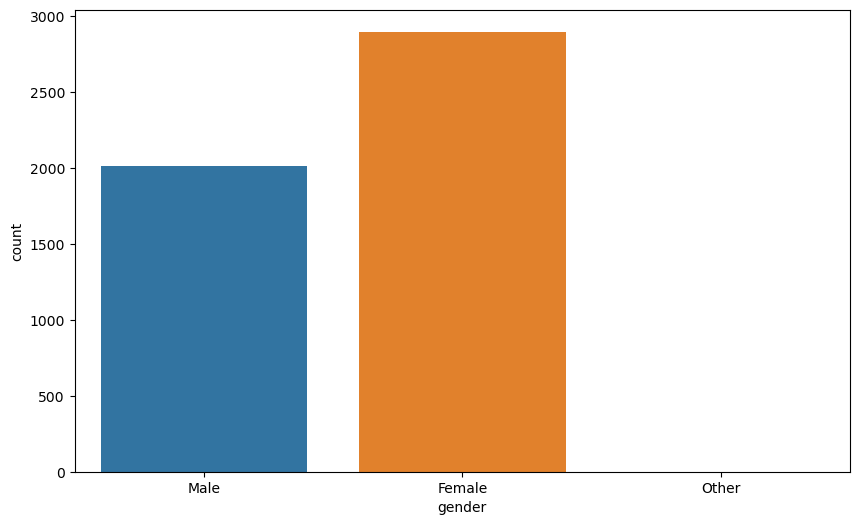

In [27]:
#create a countplot for gender column
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df)

<Axes: xlabel='work_type', ylabel='count'>

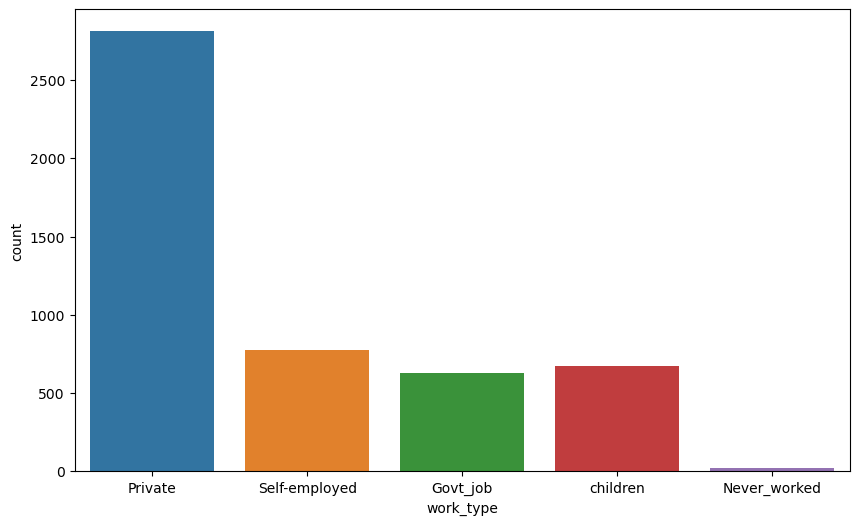

In [28]:
#create a countplot for work type column
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

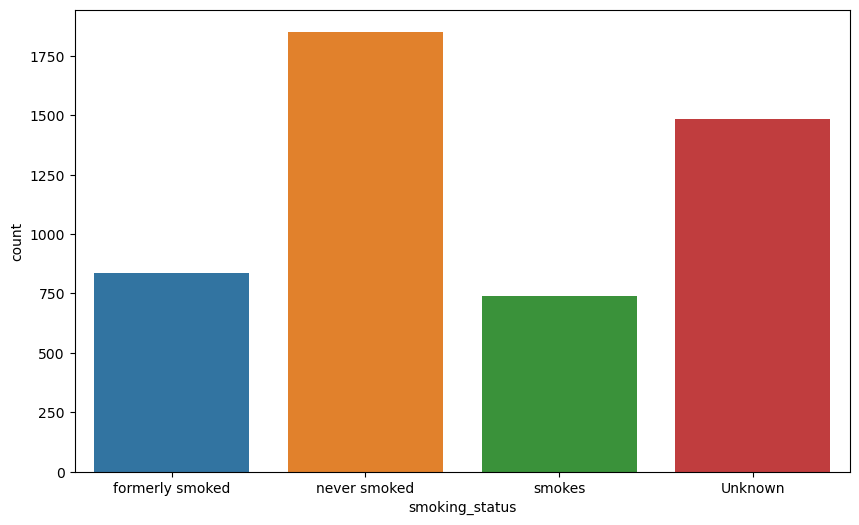

In [29]:
#create a countplot for smoking status column
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df)

<Axes: xlabel='stroke', ylabel='count'>

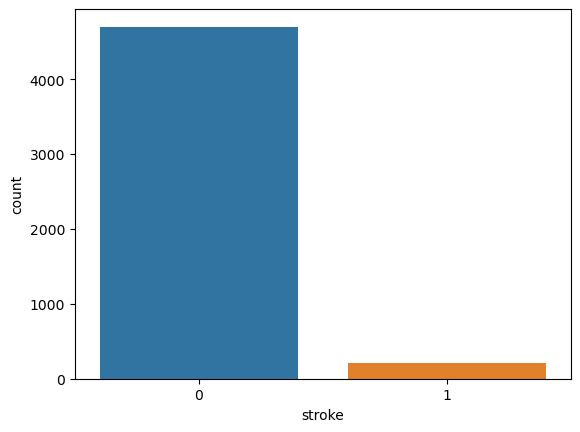

In [30]:
#create a countplot for target variable "stroke" column
sns.countplot(x="stroke", data =df)

Note: Here we are able to see that provided dataset is 
imbalance means in our dataset most number of patients are
not suffering from stroke (4500+) and minimum number of patients 
suffer from stroke around (200 - 300). So, this will effect on 
our machine learning model future. Hence, we will just continue
this project for learning purpose, althrough our model perform
worse for real time data and it will perform wrong predictions.

0 indicates patient not suffer from stroke and 1 indicates 
patient suffer from stroke.
    

Bivariate Analysis

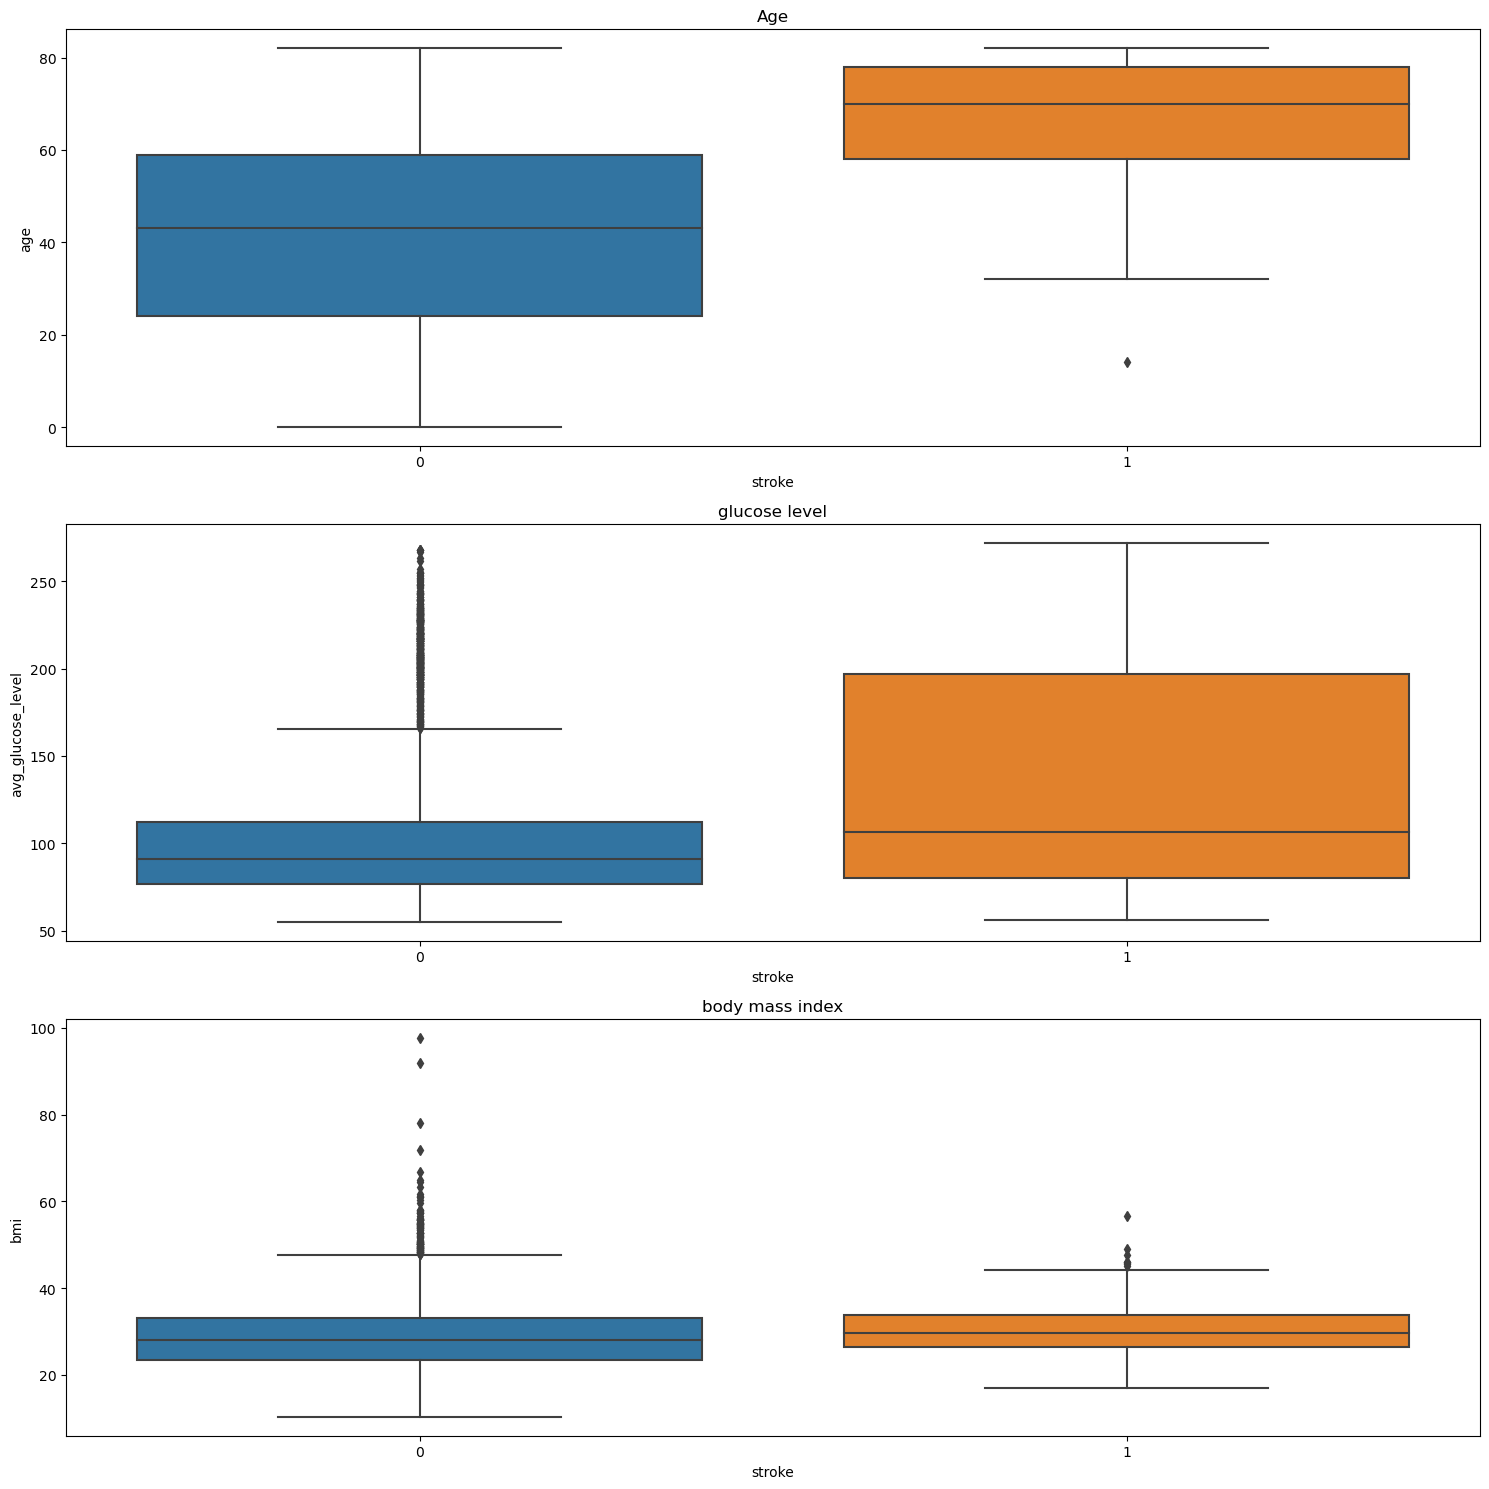

In [31]:
#Let's plot the boxplot for all numeric continous columns w.r.t target feature
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.boxplot(x=df["stroke"], y=df["age"], data=df)
plt.title("Age")

plt.subplot(3,1,2)
sns.boxplot(x=df["stroke"], y=df["avg_glucose_level"], data=df)
plt.title("glucose level")

plt.subplot(3,1,3)
sns.boxplot(x=df["stroke"], y=df["bmi"], data=df)
plt.title("body mass index")

plt.tight_layout()

Text(0.5, 1.0, 'Correlation plot of all Features')

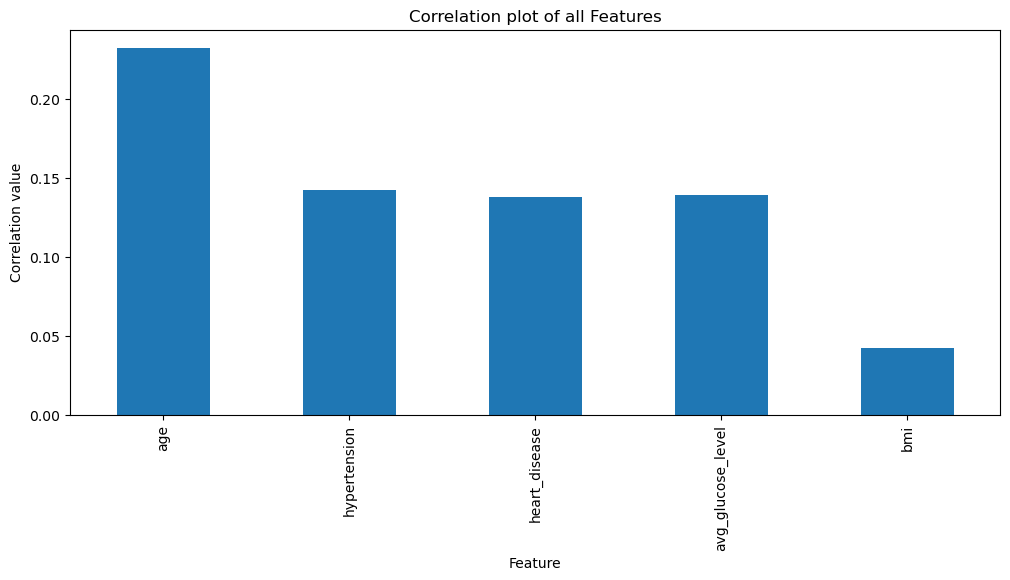

In [34]:
#Checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

# plot correlation
df.corr()["stroke"][:-1].plot(kind="bar")

# create a "x label"
plt.xlabel("Feature")

# create a "y label"
plt.ylabel("Correlation value")

# craete a title for the plot
plt.title("Correlation plot of all Features")



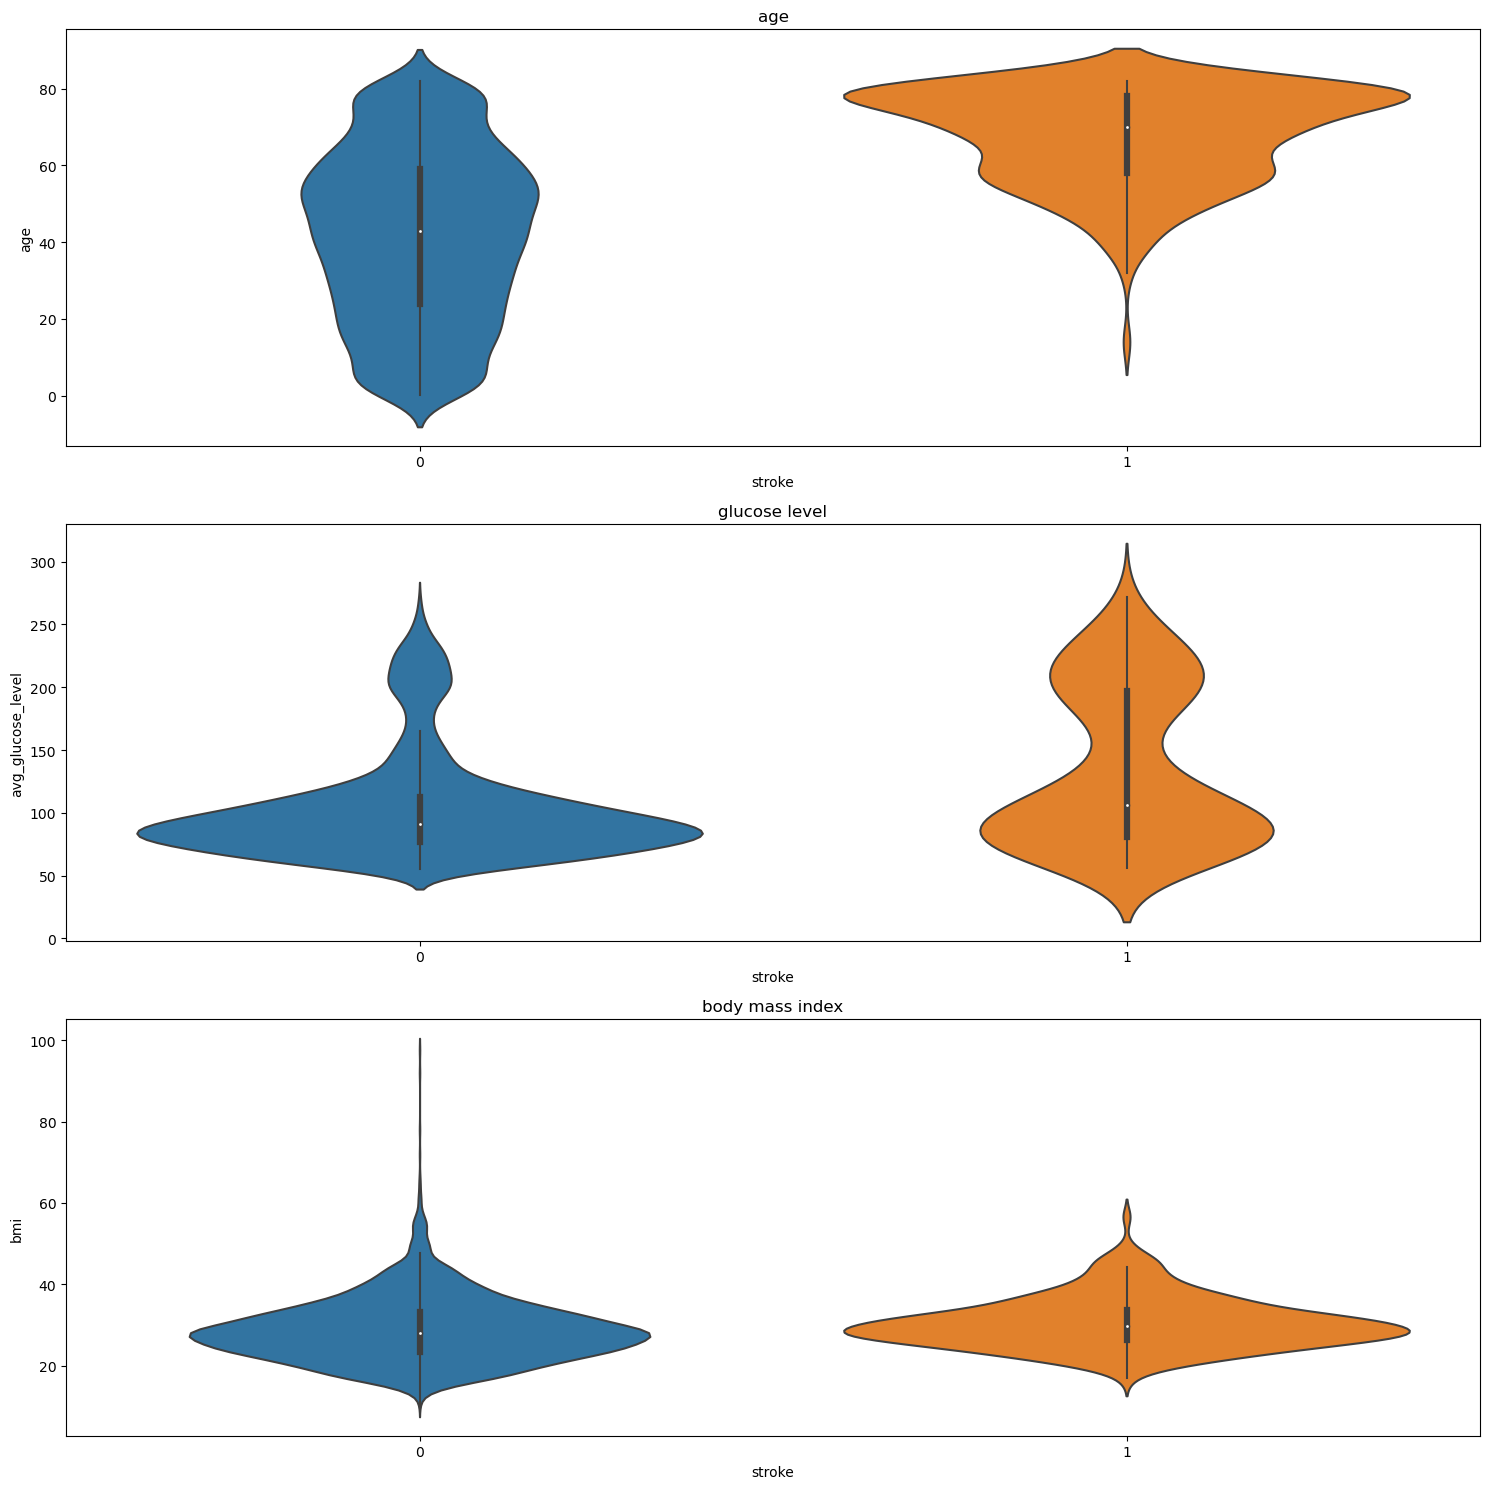

In [32]:
#Let's plot the violinplot for all numeric continous columns w.r.t target feature
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.violinplot(x=df["stroke"], y=df["age"], data=df)
plt.title("age")

plt.subplot(3,1,2)
sns.violinplot(x=df["stroke"], y=df["avg_glucose_level"], data=df)
plt.title("glucose level")

plt.subplot(3,1,3)
sns.violinplot(x=df["stroke"], y=df["bmi"], data=df)
plt.title("body mass index")

plt.tight_layout()



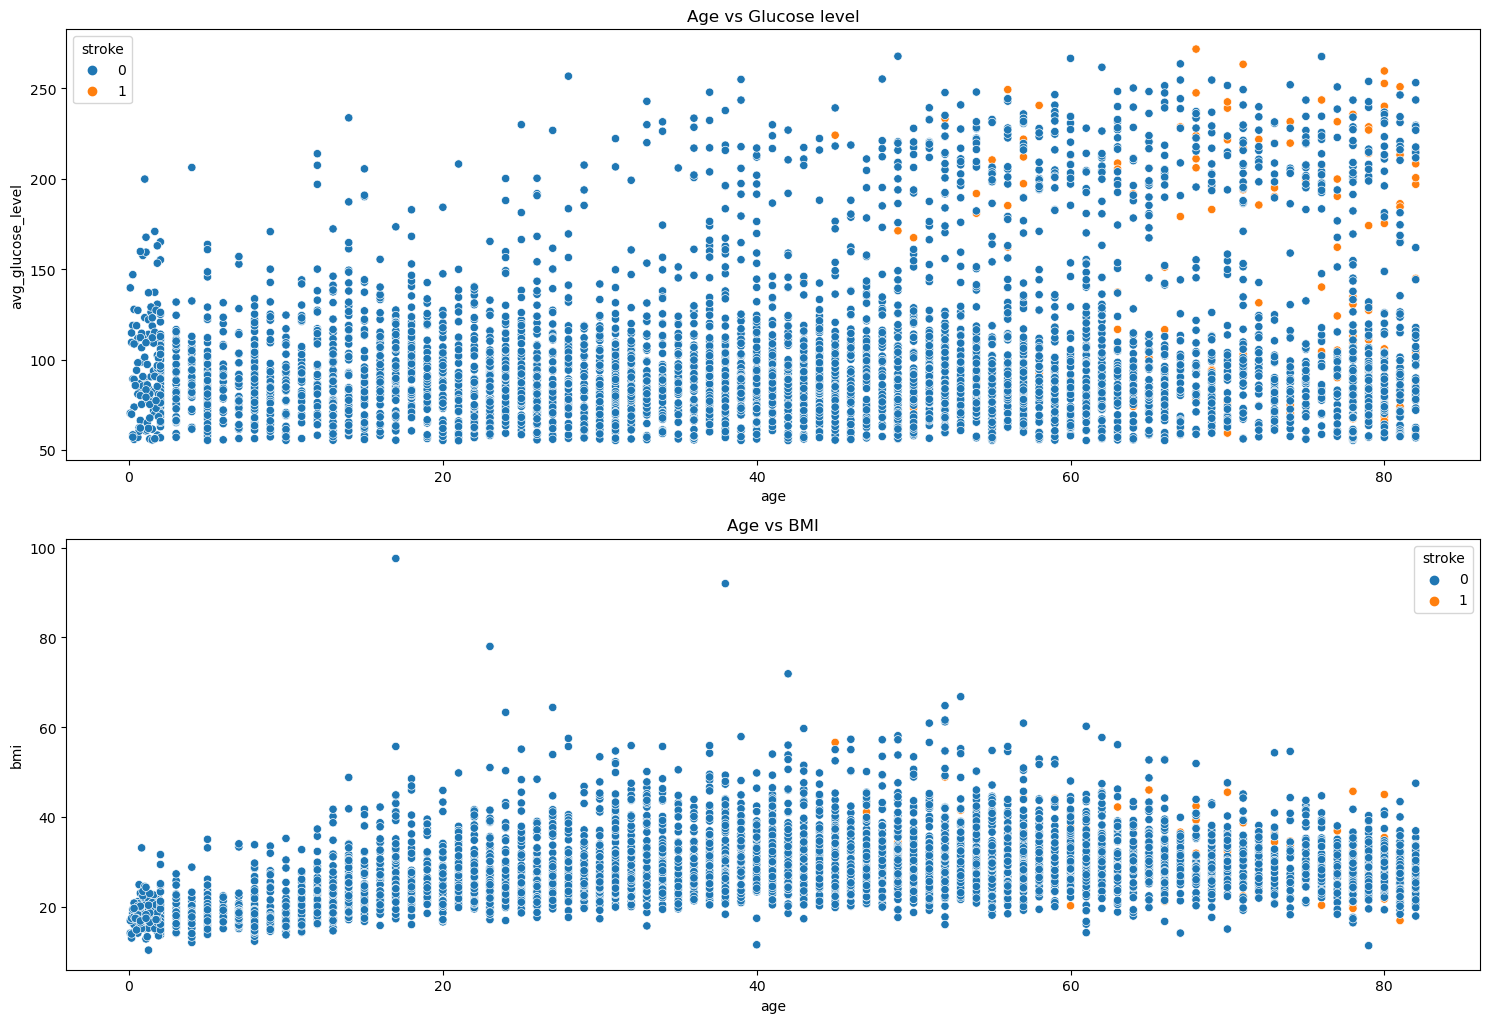

In [33]:
#check the relation between "Age" vs "Glucose Level" and "Age" vs "BMI" with age
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x=df["age"], y=df["avg_glucose_level"],hue="stroke", data=df)
plt.title("Age vs Glucose level")

plt.subplot(3,1,2)
sns.scatterplot(x=df["age"], y=df["bmi"], hue="stroke", data=df)
plt.title("Age vs BMI")

plt.tight_layout()

Text(0.5, 1.0, 'BMI vs Glucose Level')

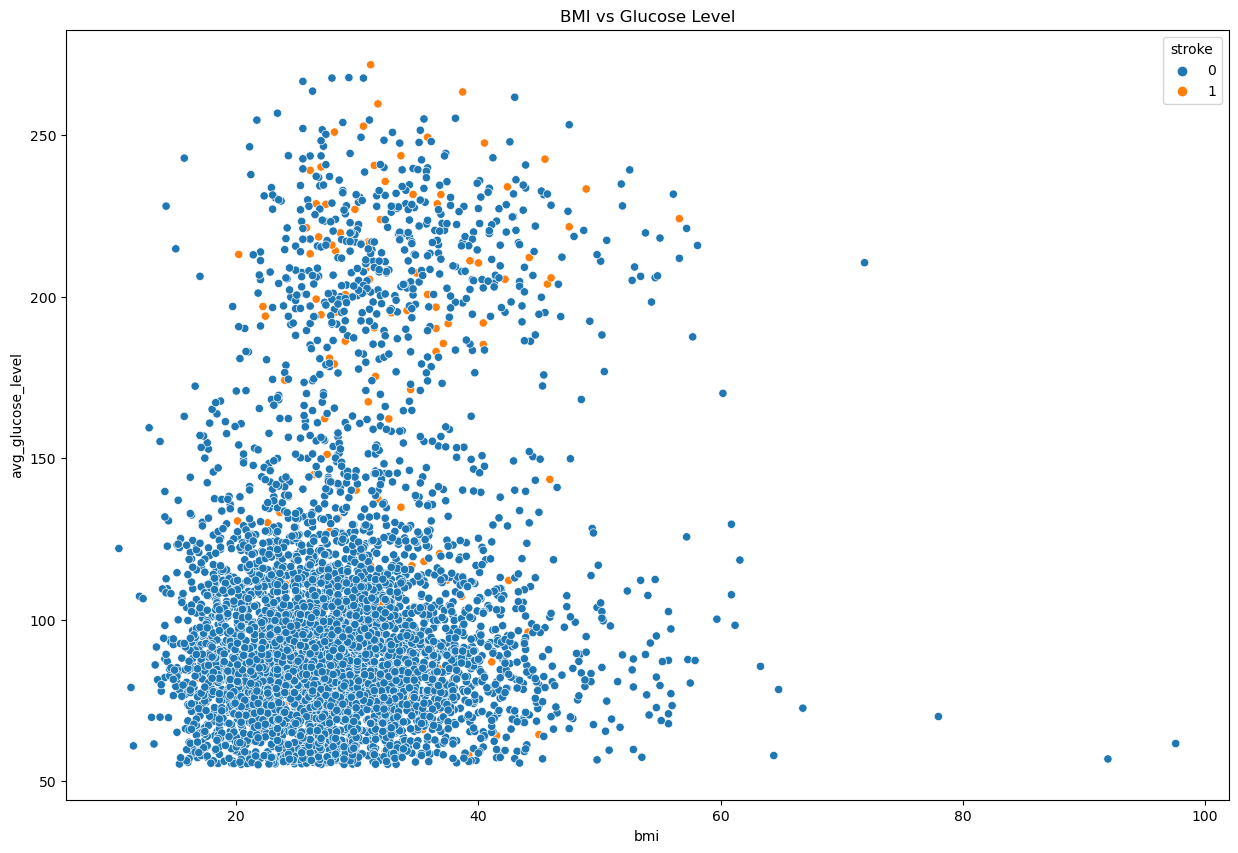

In [34]:
# check the relation between "BMI" vs "Glucose Level" with scatterplot
plt.figure(figsize=(15,10))

sns.scatterplot(x=df["bmi"], y=df["avg_glucose_level"], hue="stroke", data=df)
plt.title("BMI vs Glucose Level")

Multi variate Analysis

Text(0.5, 1.0, 'heatmap of dataframe (without label encoding)')

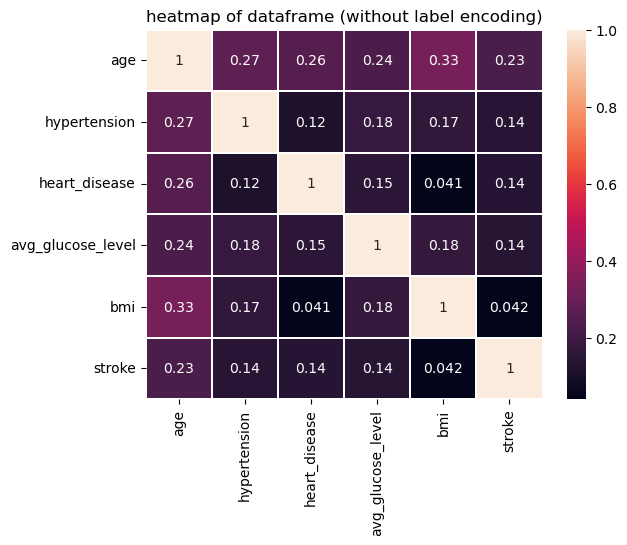

In [35]:
# create a heatmap to visualize the correlation between all features

# create a variable for correlation
df_corr=df.corr()

# plot heatmap
sns.heatmap(df_corr,annot=True, linecolor="white", linewidth=0.2)

#set a title
plt.title("heatmap of dataframe (without label encoding)")

Data Preprocessing 2(Label Encoding)

In [36]:
#import sklearn function "LabelEncoder" for converting categorical value
from sklearn.preprocessing import LabelEncoder

# make a averiable for Labelencoder function
label_encoder = LabelEncoder()

'Gender' encoding of "Gender" column in datatype

In [37]:
#Label encoding of "Gender"  column in dataframe
df["gender"] = label_encoder.fit_transform(df["gender"])

"Ever Married" column Label Encoding

In [38]:
#Label encoding of "ever Married" column in dataframe
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])

"Work type" column Label Encoding

In [39]:
#Label encoding of "Work type" column in dataframe
df["work_type"] = label_encoder.fit_transform(df["work_type"])

"Residence Type" column Label Encoding

In [40]:
#Label encoding of "Residence Type" column in dataframe
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])

"Smoking Status" column Label Encoding

In [41]:
#Label encoding of "smoking status" column in dataframe
df["smoking_status"] = label_encoder.fit_transform(df["smoking_status"])

In [42]:
#Let's us take a look that our features encoded or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


Boom! As we are able to see that our all features now in numeric values
without increasing the number of columns in dataframe, we can use get_dummy
function of pandas library but that increase the number of features
in dataframe that will effect on our machine learning model.

Heatmap

Text(0.5, 1.0, 'Heatmap of Dataframe (After Label Encoding)')

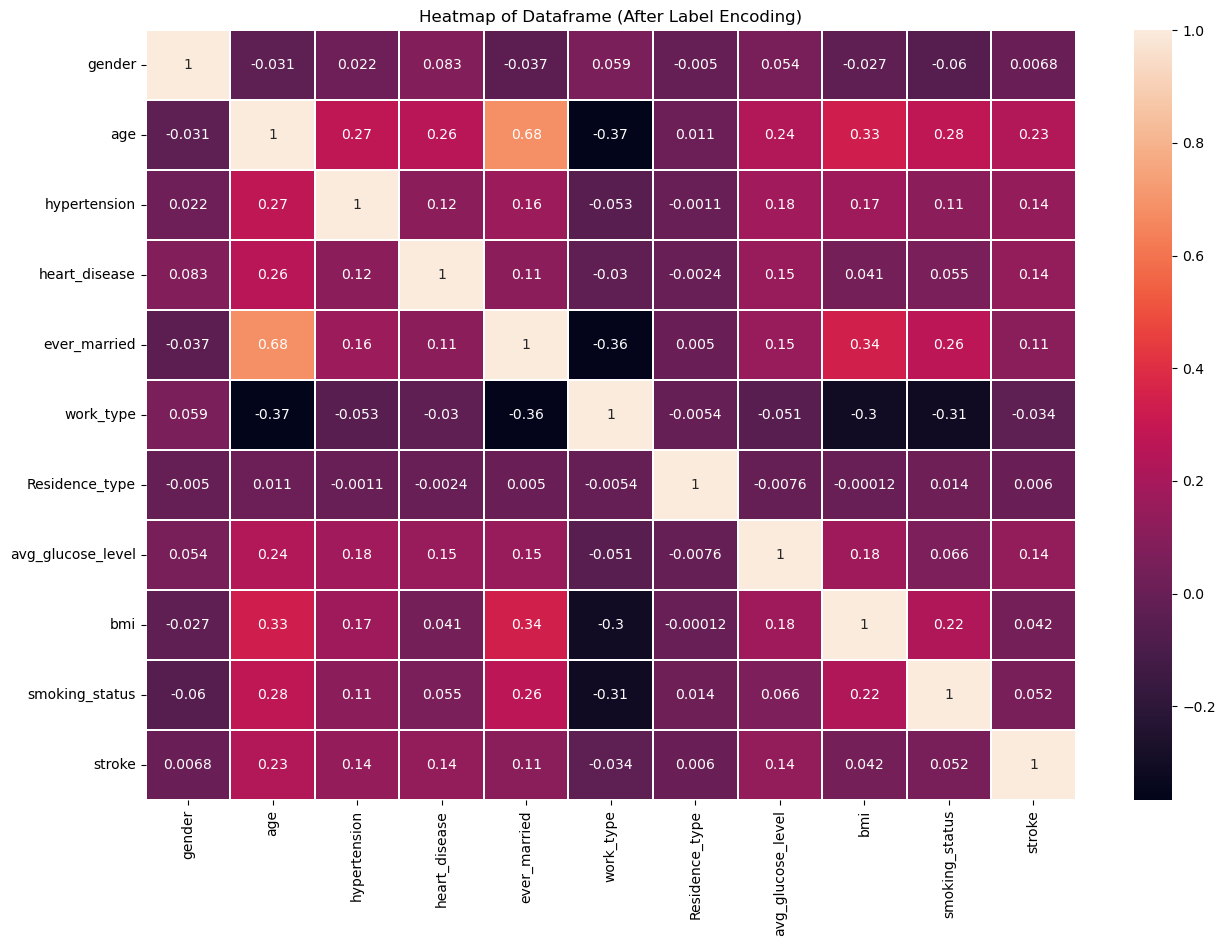

In [43]:
#create a heatmap to visualize the correlation between all features

# adjust the size of heatmap
plt.figure(figsize=(15,10))


# create a variable for correlation
df_corr = df.corr()

# plot heatmap
sns.heatmap(df_corr, annot=True, linecolor="white", linewidths=0.2)

# set a title
plt.title ("Heatmap of Dataframe (After Label Encoding)")

Text(0, 0.5, 'correlation plot of all Features')

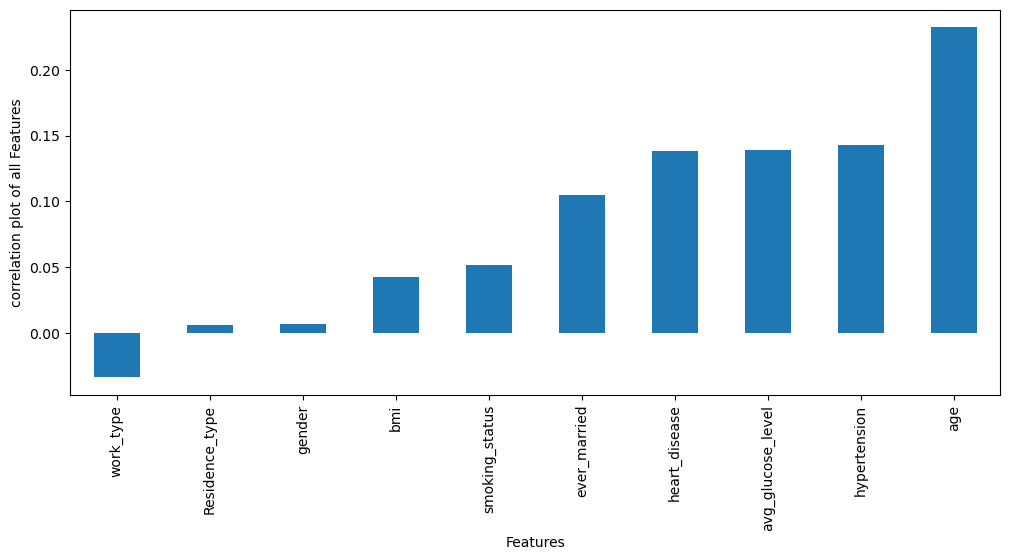

In [44]:
# checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

#plot correlation
df.corr()["stroke"][:-1].sort_values().plot(kind="bar")

#create a "x label"
plt.xlabel("Features")

# create a "y label"
plt.ylabel("correlation plot of all Features")

Machine learning model

Import All Libraries used to build model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import shap


Splitting of Data

In [46]:
# splitting data into dependent and independent variables

# independent variable

X = df.drop("stroke", axis=1)

# dependent variable
y = df["stroke"]

Sampling Data (Handling Imbalanced Dataset)

<Axes: xlabel='stroke', ylabel='count'>

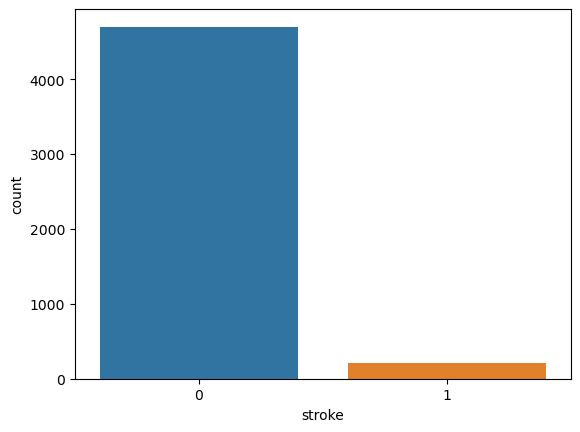

In [47]:
# check the original dataset classes
sns.countplot(x=y, data=df)

In [48]:
# using sampling technique to balance tje classes

# import library

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X,y)

print("original dataset shape", Counter(y))
print("Resample dataset shape", Counter(y_res))

original dataset shape Counter({0: 4700, 1: 209})
Resample dataset shape Counter({1: 4700, 0: 4700})


<Axes: xlabel='stroke', ylabel='count'>

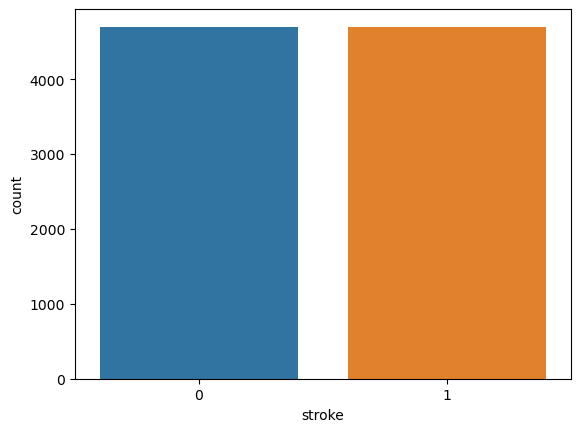

In [49]:
# Check the dataset classes after resampling
sns.countplot(x=y_res, data=df)

In [50]:
# splitting data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.5)

In [51]:
# shape of all training and testing data variables
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4700, 10), (4700, 10), (4700,), (4700,))

Scaling Train and Test Data

In [52]:
# make a variable for "MinMaxScale"  function
scaler = MinMaxScaler()

# scaling training data variable
x_train = scaler.fit_transform(x_train)

# scaling testing data variable
x_text = scaler.transform(x_test)

Making an object

In [53]:
# making an object for all machine-Learning algorithms
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb = MultinomialNB()

Accuracy Check For All Algorithms

In [54]:
# making a list of all used ml algorithms
ml_names =  ["Logistic Reg.", "Decision Tree", "Random Forest", "SVM", "k Nearest Neighbors", "Naive Bayes"]

# making a list of all used ml algorithms object
ml_object = [lr, dtree, rfc, svm, knn, nb]

#using for loop to check the accuracy for all algorithms
print("Accuracy of all algorithms\n")

#using for loop to check the accuracy for all algorithms
print("Accuracy of all algorithms\n")

#using both lists in our loop
for i, j in zip(ml_names, ml_object):
 
    # training our all algorithms
    j.fit(x_train, y_train)
    
    # make predictions for all algorithms with the help of test data
    pred = j.predict(x_test)
    
    # printing accuracy for all algorithms
    print(f'{i} : {accuracy_score(y_test, pred)*100:.2f}%\n')

Accuracy of all algorithms

Accuracy of all algorithms

Logistic Reg. : 50.28%

Decision Tree : 49.68%

Random Forest : 49.72%

SVM : 49.72%

k Nearest Neighbors : 50.96%

Naive Bayes : 50.28%



Log Loss Check for all Algorithms

In [55]:
# making a list of all used ml algorithms
ml_names = ["Logistic Reg.", "Decision Tree", "Random Forest", "SVM", "K Nearest Neighbors", "Naive Bayes"]

# making a list of all used ml algorithms object
ml_object = [lr,dtree, rfc, svm, knn, nb]

# using for loop to check the accuracy for all algorithms
print("Log Loss of all Algorithms\n")
#using both lists in our loop
for i, j in zip(ml_names, ml_object):
    
    # training our all algorithms
    j.fit(x_train, y_train)
    
    # make predictions for all algorithms with the the help pf test data
    pred = j.predict(x_test)
    
    # printing log loss for all algorithms
    print(f'{i} : {log_loss(y_test,pred):.2f}\n')

Log Loss of all Algorithms

Logistic Reg. : 17.92

Decision Tree : 18.14

Random Forest : 18.12

SVM : 18.12

K Nearest Neighbors : 17.68

Naive Bayes : 17.92



As we see all the algorithms works well and all gives 90%+ accuracy
for our testing data. But, we need only one algorithms to make prediction.
So, we are going to work on top 3 algorithms which work amazing above
on the basis of Accuracy score(need max.score) and log loss score
(need min.score).

Evaluation of selected Algorithms

In [56]:
# making a list of selected ml algorithms
ml_names = ["Random Forest", "Decision Tree", "K Nearest Neighbor"]

# making a list of selected ml algorithms object
ml_object = [rfc, dtree, knn]

# using for loop to check the confusion matric and classificationreport
# using both lists in our loop
for i, j in zip(ml_names, ml_object):
    print(f'{i} Evaluation:\n')
    # training our all algorithms
    j.fit(x_train, y_train)
    
    # make predictions for all algorithms with the help of test data
    pred = j.predict(x_test)
    
    # printing classifiaction report for all algorithms
    print(f'{i} Classification Report:')
    print(f'{classification_report(y_test, pred)}\n')
          
    # printing confusion matrix for all algorithms
    print(f'{i} Confusion Matrix:')
    print(f'{confusion_matrix(y_test, pred)}\n')
    print("="*70)

Random Forest Evaluation:

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2337
           1       0.00      0.00      0.00      2363

    accuracy                           0.50      4700
   macro avg       0.25      0.50      0.33      4700
weighted avg       0.25      0.50      0.33      4700


Random Forest Confusion Matrix:
[[2337    0]
 [2363    0]]

Decision Tree Evaluation:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2337
           1       0.00      0.00      0.00      2363

    accuracy                           0.50      4700
   macro avg       0.25      0.50      0.33      4700
weighted avg       0.25      0.50      0.33      4700


Decision Tree Confusion Matrix:
[[2335    2]
 [2363    0]]

K Nearest Neighbor Evaluation:

K Nearest Neighbor Classification Report:
              precisio

Random Forest

In [57]:
# Performing Hyperparameter tuning for more accurate performance

# Define a dictionary of hyperparameters and their possible values

param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [10,20,30],    # Maximum depth of individual
    "min_samples_split" : [2,5,10], # Minimum samples required to
    "min_samples_leaf" : [1,2,4] # Minimum samples required
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator = rfc, param_grid=param_grid,
cv=5, scoring = "accuracy")

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# Get the best model
best_rfc_model = grid_search.best_estimator_

# Make predictions with the best model
rfc_pred = best_rfc_model.predict(x_test)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

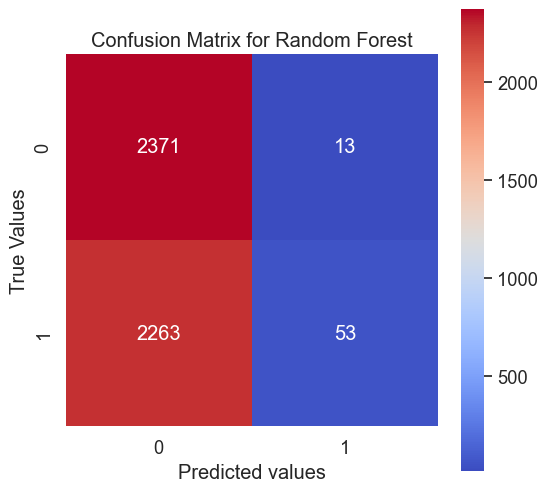

In [185]:
# making confusion matrix
cm = confusion_matrix(y_test, rfc_pred)

# adjust the size of the confusion matrix
plt. figure(figsize=(6,6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the random forest
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", square=True)

plt.xlabel("Predicted values") # x label of the confusion matrix
plt.ylabel("True Values") # y label of the confudsion matrix
plt.title("Confusion Matrix for Random Forest") # title of the confusion matrix

In [240]:
# shap plot for the random forest model
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x.columns)

NameError: name 'shap' is not defined

In [61]:
# ROC and AUC score for the random forest model
rfc_pred_prob = rfc.predict_proba(x_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=["y actual"]),
                                            pd.DataFrame(rfc_pred_prob, columns=["y pred prob"])])
rfc_actual_predict.index =  y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict["y actual"], rfc_actual_predict ["y pred prob"])
auc = roc_auc_score(rfc_actual_predict["y actual"], rfc_actual_predict["y pred prob"])

plt.plot(fpr, tpr, label="AUC=%.4f"%auc)
plt.plot(fpr, fpr, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()

ValueError: Length mismatch: Expected axis has 9400 elements, new values have 4700 elements

Decision Tree

In [59]:
# Define a dictionry of hyperparameters and their possible values
param_grid = {
    "criterion" : ["gini", "entropy"],  # splitting criterion
    "max_depth" : [10,20,30], # Maximum depth of the tree
    "min_samples_split" : [2,5,10], #Minimum samples required to split an
    "min_samples_leaf" : [1, 2, 4] #Minimum samples required to be at  a leaf
}

# create a GridSearchCV object
grid_search = GridSeachCV(estimator=dtree, param_grid=param_grid, cv=5, scoring="accuracy")

# fit the grid search to your training data
grid_search.fit(x_train, y_tarin)

# Get the best hyperameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dtree_model = grid_search.best_estimator_

#Make predictions with the best model
dtree_pred = best_dtree_model.predict(x_test)

NameError: name 'GridSeachCV' is not defined

In [60]:
# making confusion matrix
cm = confusion_matrix(y_test, dtree_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)

#create a heatmap which show the confusion matrix of the decision tree model
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", square=True,
           xticklabels=["0", "1"])

plt.xlabel("Predicted Values") # x label of the confusion matrix
plt.ylabel("True Values") # y label of confusion matrix
plt.title("Confusion Matrix for Decision Tree") # tittle of the confusion matrix


NameError: name 'dtree_pred' is not defined

In [ ]:
42# ROC and AUC score for the decision tree model
dtree_pred_prob = dtree.predict_proba(x_test)[:][:,1]

dtree_actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=
                                              ["y actual"]), pd.DtataFrame(dtree_pred_prob,
                                                                          columns=["y pred prob"])])
dtree_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(dtree_actual_predict["y actual"], dtree_actual_predict["y pred prob"])
auc = roc_auc_score(dtree_actual_predict["y actual"], dtree_actual_predict["y pred prob"])

plt.plot(fpr, tpr, label="AUC=%.4f"%auc)
plt.plot(fpr, fpr, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()

Saving Decision Tree Model

In [61]:
import pickle

In [62]:
# use dump() function to save the model with pickel
save_dtree_model = pickle.dumps(best_dtree_model)

# use load() function to loading the saved model
dtree_from_pickle = pickle.loads(save_rfc_model)

# after loading, use test data to predict the outcome
dtree_from_pickle.predict(x_test)



NameError: name 'best_dtree_model' is not defined

In [63]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [64]:
rfc_from_pickle.predict([1,67.0, 0, 1, 1, 2, 1, 228.69, 36.6, 1])

NameError: name 'rfc_from_pickle' is not defined